# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"
clean_output_data_file = "../output_data/clean_cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
cities

['port alfred',
 'castro',
 'dombas',
 'pemba',
 'kirakira',
 'attawapiskat',
 'gubkinskiy',
 'rikitea',
 'hilo',
 'salinas',
 'half moon bay',
 'avarua',
 'marcona',
 'busselton',
 'tasiilaq',
 'yunjinghong',
 'ushuaia',
 'punta arenas',
 'port macquarie',
 'hobart',
 'albany',
 'nanortalik',
 'provideniya',
 'ipswich',
 'barrow',
 'sobolevo',
 'luau',
 'vaini',
 'vaitupu',
 'clyde river',
 'airai',
 'griffith',
 'yellowknife',
 'kapaa',
 'riberalta',
 'kysyl-syr',
 'hermanus',
 'puerto ayora',
 'bluff',
 'talnakh',
 'puerto ayacucho',
 'prince rupert',
 'cabedelo',
 'port lincoln',
 'mogadishu',
 'dikson',
 'cape town',
 'husavik',
 'east london',
 'mataura',
 'ponta do sol',
 'port elizabeth',
 'ilulissat',
 'jammalamadugu',
 'victoria',
 'buta',
 'klaksvik',
 'khormuj',
 'baykit',
 'vardo',
 'kavieng',
 'todos santos',
 'georgetown',
 'wukari',
 'sao filipe',
 'henties bay',
 'pangnirtung',
 'altamont',
 'saint anthony',
 'waingapu',
 'falaleu',
 'hirado',
 'nikolskoye',
 'yerbogac

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
city = "busselton"

# # Build query URL
query_url = url + "appid=" + weather_api_key + "&units=" + units + "&q=" + city
print(query_url)

output = requests.get(query_url).json()

output

#cities


http://api.openweathermap.org/data/2.5/weather?appid=49095c030c922ca185d30b36412f4aaf&units=imperial&q=busselton


{'coord': {'lon': 115.33, 'lat': -33.65},
 'weather': [{'id': 801,
   'main': 'Clouds',
   'description': 'few clouds',
   'icon': '02d'}],
 'base': 'stations',
 'main': {'temp': 50.92,
  'feels_like': 48.36,
  'temp_min': 48.99,
  'temp_max': 52,
  'pressure': 1009,
  'humidity': 84},
 'visibility': 10000,
 'wind': {'speed': 3, 'deg': 82, 'gust': 8.01},
 'clouds': {'all': 11},
 'dt': 1596421745,
 'sys': {'type': 3,
  'id': 2020551,
  'country': 'AU',
  'sunrise': 1596409735,
  'sunset': 1596447644},
 'timezone': 28800,
 'id': 2075265,
 'name': 'Busselton',
 'cod': 200}

In [10]:

city_name = []
country = []
lat = []
long = []
temp = []
humidity = []
cloud = []
wind = []

count = 0

print("Beginning Data Retrieval")
print("-----------------------------")

# Loop through the list of cities and perform a request for data on each
for city in cities:
#for city in ["new york"]:
    
    count = count + 1
    
    # Build query URL
    query_url = url + "appid=" + weather_api_key + "&units=" + units + "&q=" + city
    #print(query_url)

    try:
        output = requests.get(query_url).json()
        
        # Check the temperature first. If the retrieval was bad, it will keep all the others the same length
        temp.append(output['main']['temp'])
        humidity.append(output['main']['humidity'])
        cloud.append(output['clouds']['all'])
        wind.append(output['wind']['speed'])
        
        lat.append(output['coord']['lat'])
        long.append(output['coord']['lon'])
        country.append(output['sys']['country'])
        city_name.append(city)

        print(f"Processing Record {count} of Set 1 | {city}")
        
    except:
        print("City not found. Skipping...")
              
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | port alfred
Processing Record 2 of Set 1 | castro
Processing Record 3 of Set 1 | dombas
Processing Record 4 of Set 1 | pemba
Processing Record 5 of Set 1 | kirakira
City not found. Skipping...
Processing Record 7 of Set 1 | gubkinskiy
Processing Record 8 of Set 1 | rikitea
Processing Record 9 of Set 1 | hilo
Processing Record 10 of Set 1 | salinas
Processing Record 11 of Set 1 | half moon bay
Processing Record 12 of Set 1 | avarua
City not found. Skipping...
Processing Record 14 of Set 1 | busselton
Processing Record 15 of Set 1 | tasiilaq
City not found. Skipping...
Processing Record 17 of Set 1 | ushuaia
Processing Record 18 of Set 1 | punta arenas
Processing Record 19 of Set 1 | port macquarie
Processing Record 20 of Set 1 | hobart
Processing Record 21 of Set 1 | albany
Processing Record 22 of Set 1 | nanortalik
Processing Record 23 of Set 1 | provideniya
Processing Record 24 of Set 1 | ipswich
Pro

Processing Record 203 of Set 1 | tonstad
Processing Record 204 of Set 1 | south sioux city
Processing Record 205 of Set 1 | saint-philippe
Processing Record 206 of Set 1 | brigantine
Processing Record 207 of Set 1 | qaqortoq
Processing Record 208 of Set 1 | saint-pierre
Processing Record 209 of Set 1 | villamontes
Processing Record 210 of Set 1 | batagay
Processing Record 211 of Set 1 | codrington
Processing Record 212 of Set 1 | uruzgan
Processing Record 213 of Set 1 | teeswater
Processing Record 214 of Set 1 | vestmannaeyjar
Processing Record 215 of Set 1 | hasaki
Processing Record 216 of Set 1 | clovis
Processing Record 217 of Set 1 | garowe
Processing Record 218 of Set 1 | suwannaphum
Processing Record 219 of Set 1 | cuyo
Processing Record 220 of Set 1 | mercedes
Processing Record 221 of Set 1 | silao
Processing Record 222 of Set 1 | kuytun
Processing Record 223 of Set 1 | biltine
Processing Record 224 of Set 1 | ahipara
Processing Record 225 of Set 1 | presidencia roque saenz pena

Processing Record 402 of Set 1 | eureka
Processing Record 403 of Set 1 | khorinsk
Processing Record 404 of Set 1 | sumenep
Processing Record 405 of Set 1 | columbus
City not found. Skipping...
Processing Record 407 of Set 1 | the valley
Processing Record 408 of Set 1 | conde
Processing Record 409 of Set 1 | san quintin
Processing Record 410 of Set 1 | sibu
Processing Record 411 of Set 1 | kautokeino
Processing Record 412 of Set 1 | rio grande
Processing Record 413 of Set 1 | ancud
City not found. Skipping...
Processing Record 415 of Set 1 | koygorodok
Processing Record 416 of Set 1 | belaya gora
Processing Record 417 of Set 1 | kumluca
Processing Record 418 of Set 1 | jemnice
Processing Record 419 of Set 1 | vila velha
Processing Record 420 of Set 1 | dong hoi
Processing Record 421 of Set 1 | ordynskoye
Processing Record 422 of Set 1 | kemi
Processing Record 423 of Set 1 | florianopolis
Processing Record 424 of Set 1 | djenne
Processing Record 425 of Set 1 | coquimbo
Processing Record 

Processing Record 603 of Set 1 | burghausen
Processing Record 604 of Set 1 | pontianak
Processing Record 605 of Set 1 | namibe
Processing Record 606 of Set 1 | neiafu
City not found. Skipping...
City not found. Skipping...
Processing Record 609 of Set 1 | fort nelson
Processing Record 610 of Set 1 | trincomalee
Processing Record 611 of Set 1 | port moresby
Processing Record 612 of Set 1 | pochutla
Processing Record 613 of Set 1 | macau
Processing Record 614 of Set 1 | chifeng
Processing Record 615 of Set 1 | bushehr
-----------------------------
Data Retrieval Complete
-----------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [11]:
# # create a dictionary to contain all the list variables

list_of_lat = [float(item) for item in lat]
list_of_long = [float(item) for item in long]
list_of_temp = [float(item) for item in temp]
list_of_humid = [float(item) for item in humidity]
list_of_cloud = [float(item) for item in cloud]
list_of_wind = [float(item) for item in wind]

weather_dict = {
    "City": city_name,
    "Country": country,    
    "Latitude": list_of_lat,
    "Longitude": list_of_long,
    "Temperature": list_of_temp,
    "Humidity": list_of_humid,
    "Cloud": list_of_cloud,
    "Wind": list_of_wind
}

# convert the dictionary into a dataframe
weather_data_df = pd.DataFrame(weather_dict)

weather_data_df.to_csv(output_data_file)
weather_data_df.head()


,City,Country,Latitude,Longitude,Temperature,Humidity,Cloud,Wind
0,port alfred,ZA,-33.59,26.89,69.78,24.0,0.0,13.73
1,castro,BR,-24.79,-50.01,49.62,94.0,0.0,4.09
2,dombas,NO,62.07,9.12,46.94,81.0,100.0,9.66
3,pemba,MZ,-12.97,40.52,69.42,83.0,20.0,13.87
4,kirakira,SB,-10.45,161.92,84.13,74.0,24.0,7.94


In [12]:
weather_data_df.shape

(558, 8)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [13]:
# Get the indices of cities that have humidity over 100%.
humidity_outliers_df = weather_data_df[weather_data_df["Humidity"] > 100]
humidity_outliers_df.index.values

array([], dtype=int64)

In [14]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data_df = weather_data_df.drop(humidity_outliers_df.index.values, inplace=False)
clean_city_data_df

weather_data_df.shape
clean_city_data_df.shape

# Export the City_Data into a csv
clean_city_data_df.to_csv(clean_output_data_file)

In [ ]:
# Extract relevant fields from the data frame




## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

Text(0.5, 1.0, 'Temperature (F) vs Latitude')

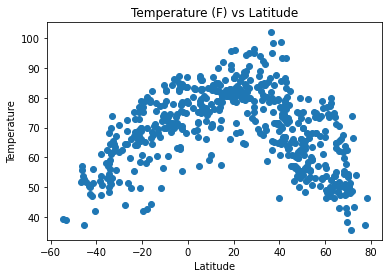

In [15]:
plt.scatter(clean_city_data_df["Latitude"], clean_city_data_df["Temperature"])
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.title("Temperature (F) vs Latitude")

## Latitude vs. Humidity Plot

Text(0.5, 1.0, 'Humidity (%) vs Latitude')

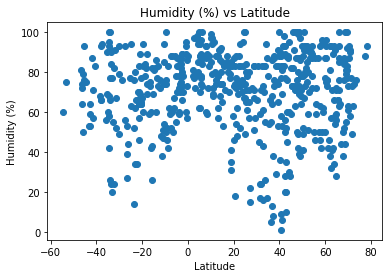

In [20]:
plt.scatter(clean_city_data_df["Latitude"], clean_city_data_df["Humidity"])
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Humidity (%) vs Latitude")

## Latitude vs. Cloudiness Plot

Text(0.5, 1.0, 'Cloudiness vs Latitude')

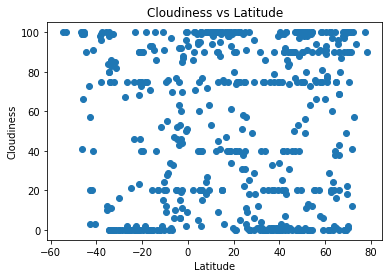

In [21]:
plt.scatter(clean_city_data_df["Latitude"], clean_city_data_df["Cloud"])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Cloudiness vs Latitude")

## Latitude vs. Wind Speed Plot

Text(0.5, 1.0, 'Wind (MPH) vs Latitude')

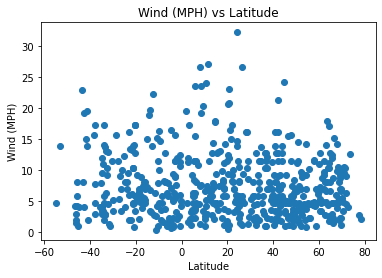

In [22]:
plt.scatter(clean_city_data_df["Latitude"], clean_city_data_df["Wind"])
plt.xlabel("Latitude")
plt.ylabel("Wind (MPH)")
plt.title("Wind (MPH) vs Latitude")

## Linear Regression

In [ ]:
# OPTIONAL: Create a function to create Linear Regression plots

In [ ]:
# Create Northern and Southern Hemisphere DataFrames

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression